In [40]:
import os
import numpy as np
from doped.pycdt.utils import parse_calculations

In [41]:
from doped.pycdt.corrections.finite_size_charge_correction import get_correction_freysoldt, get_correction_kumagai

# CdTe

In [2]:
BULK_DATA_DIR = "../examples/Bulk_Supercell/vasp_ncl"
dielectric = np.array([[9.13, 0, 0], [0.0, 9.13, 0], [0, 0, 9.13]])  # CdTe

## V_Cd

In [3]:
parsed_vac_Cd_dict = {}

for i in os.listdir("../examples"):
    if "vac_1_Cd" in i:  # loop folders and parse those with "vac_1_Cd" in name
        defect_file_path = f"../examples/{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_", ""))
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(
            path_to_defect=defect_file_path,
            path_to_bulk=BULK_DATA_DIR,
            dielectric=dielectric,
            defect_charge=defect_charge,
        )
        bo = sdp.freysoldt_loader()
        sdp.get_stdrd_metadata()
        sdp.get_bulk_gap_data()
        sdp.run_compatibility()
        parsed_vac_Cd_dict[
            i
        ] = sdp.defect_entry  # Keep dictionary of parsed defect entries

Final Freysoldt correction is 0.225 eV


0.22517150393292082

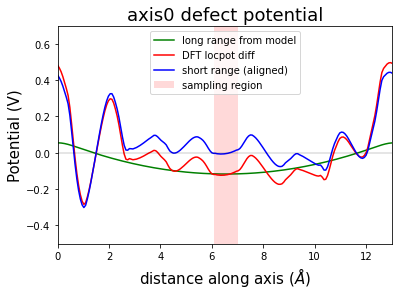

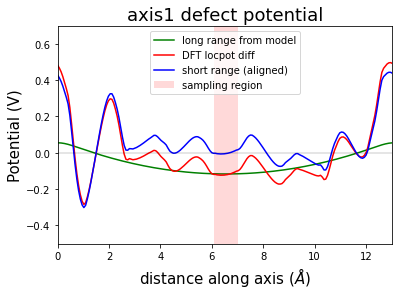

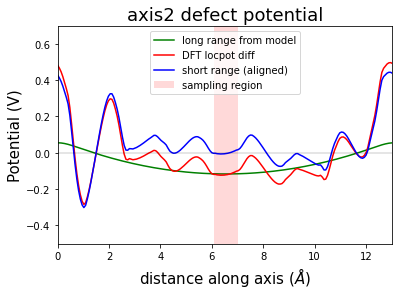

In [5]:
get_correction_freysoldt(sdp.defect_entry, epsilon=dielectric, plot=True)

In [9]:
sdp.defect_entry.parameters["initial_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
PeriodicSite: Cd (0.0000, 9.8151, 9.8151) [0.0000, 0.7500, 0.7500]
PeriodicSite: Cd (6.5434, 3.2717, 

In [11]:
sdp.defect_entry.parameters["unrelaxed_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
PeriodicSite: Cd (0.0000, 9.8151, 9.8151) [0.0000, 0.7500, 0.7500]
PeriodicSite: Cd (6.5434, 3.2717, 

In [12]:
sdp.defect_entry.parameters["final_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (13.0852, 13.0849, 6.5257) [0.9999, 0.9999, 0.4986]
PeriodicSite: Cd (13.0852, 6.5257, 13.0849) [0.9999, 0.4986, 0.9999]
PeriodicSite: Cd (0.0054, 6.5341, 6.5341) [0.0004, 0.4993, 0.4993]
PeriodicSite: Cd (6.5258, 13.0849, 13.0849) [0.4987, 0.9999, 0.9999]
PeriodicSite: Cd (6.5346, 0.0053, 6.5342) [0.4993, 0.0004, 0.4993]
PeriodicSite: Cd (6.5346, 6.5342, 0.0053) [0.4993, 0.4993, 0.0004]
PeriodicSite: Cd (6.5437, 6.5437, 6.5437) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (13.0037, 3.1740, 3.1740) [0.9937, 0.2425, 0.2425]
PeriodicSite: Cd (0.1196, 3.2264, 9.8999) [0.0091, 0.2465, 0.7565]
PeriodicSite: Cd (0.1196, 9.8999, 3.2264) [0.0091, 0.7565, 0.2465]
PeriodicSite: Cd (0.1230, 9.7825, 9.7825) [0.0094, 0.7475, 0.7475]
PeriodicSite: Cd (6.5267, 3

## Te Interstitial

In [3]:
        for i in os.listdir("../examples"):
            if "Int_Te" in i:  # loop folders and parse those with "Int_Te" in name
                defect_file_path = f"../examples/{i}/vasp_ncl"
                defect_charge = int(i[-2:].replace("_", ""))
                # parse with no transformation.json:
                sdp = parse_calculations.SingleDefectParser.from_paths(
                    path_to_defect=defect_file_path,
                    path_to_bulk=BULK_DATA_DIR,
                    dielectric=dielectric,
                    defect_charge=defect_charge,
                )
                sdp.kumagai_loader()
                sdp.get_stdrd_metadata()
                sdp.get_bulk_gap_data()
                sdp.run_compatibility()
                te_i_2_ent = sdp.defect_entry

Saving parsed Voronoi sites (for interstitial site-matching) to bulk_voronoi_sites.json to speed up future parsing.



Final Kumagai correction is 0.883 eV


0.8834518111049584

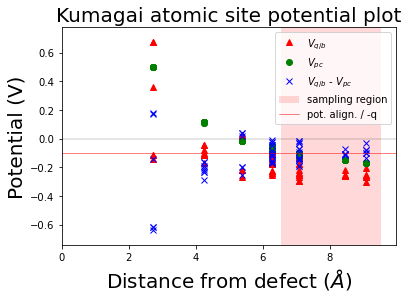

In [6]:
get_correction_kumagai(te_i_2_ent, epsilon=dielectric, title="kmg")

In [23]:
te_i_2_ent.parameters["initial_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
PeriodicSite: Cd (0.0000, 9.8151, 

In [24]:
te_i_2_ent.parameters["unrelaxed_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
PeriodicSite: Cd (0.0000, 9.8151, 

In [25]:
te_i_2_ent.parameters["final_defect_structure"]

Structure Summary
Lattice
    abc : 13.08676815 13.08676815 13.08676815
 angles : 90.0 90.0 90.0
 volume : 2241.2857250647216
      A : 13.08676815 0.0 0.0
      B : 0.0 13.08676815 0.0
      C : 0.0 0.0 13.08676815
    pbc : True True True
PeriodicSite: Cd (0.1729, 0.1901, 0.1530) [0.0132, 0.0145, 0.0117]
PeriodicSite: Cd (0.2388, 12.9981, 6.3904) [0.0182, 0.9932, 0.4883]
PeriodicSite: Cd (13.0626, 6.5248, 0.0678) [0.9982, 0.4986, 0.0052]
PeriodicSite: Cd (13.0332, 6.5406, 6.5464) [0.9959, 0.4998, 0.5002]
PeriodicSite: Cd (6.4002, 13.0426, 0.1472) [0.4891, 0.9966, 0.0112]
PeriodicSite: Cd (6.2960, 0.0325, 6.3462) [0.4811, 0.0025, 0.4849]
PeriodicSite: Cd (6.5667, 6.5425, 0.0370) [0.5018, 0.4999, 0.0028]
PeriodicSite: Cd (6.5778, 6.4948, 6.5376) [0.5026, 0.4963, 0.4996]
PeriodicSite: Cd (13.0619, 3.2918, 3.3009) [0.9981, 0.2515, 0.2522]
PeriodicSite: Cd (0.1722, 3.3745, 10.0525) [0.0132, 0.2579, 0.7681]
PeriodicSite: Cd (13.0330, 9.7710, 3.3166) [0.9959, 0.7466, 0.2534]
PeriodicSite: C

## Te_Cd_1 with Kumagai

In [12]:
for i in os.listdir("../examples"):
    if "as_1_Te" in i:  # loop folders and parse those with "Int_Te" in name
        defect_file_path = f"../examples/{i}/vasp_ncl"
        defect_charge = int(i[-2:].replace("_", ""))
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(
            path_to_defect=defect_file_path,
            path_to_bulk=BULK_DATA_DIR,
            dielectric=dielectric,
            defect_charge=defect_charge,
        )
        sdp.kumagai_loader()
        te_cd_1_ent = sdp.defect_entry


In [7]:
te_cd_1_ent.site

PeriodicSite: Te (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]

In [8]:
te_cd_1_ent.defect.site

PeriodicSite: Te (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]

In [9]:
te_cd_1_ent.parameters["initial_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0082, 0.0082, 13.0786) [0.0006, 0.0006, 0.9994]
PeriodicSite: Cd (13.0681, 13.0681, 6.5502) [0.9986, 0.9986, 0.5005]
PeriodicSite: Cd (13.0681, 6.5365, 0.0186) [0.9986, 0.4995, 0.0014]
PeriodicSite: Cd (0.0099, 6.5449, 6.5419) [0.0008, 0.5001, 0.4999]
PeriodicSite: Cd (6.5365, 13.0680, 0.0186) [0.4995, 0.9986, 0.0014]
PeriodicSite: Cd (6.5449, 0.0099, 6.5419) [0.5001, 0.0008, 0.4999]
PeriodicSite: Cd (6.5449, 6.5449, 13.0770) [0.5001, 0.5001, 0.9993]
PeriodicSite: Cd (0.0064, 3.2653, 3.2576) [0.0005, 0.2495, 0.2489]
PeriodicSite: Cd (0.0233, 3.2804, 9.8063) [0.0018, 0.2507, 0.7493]
PeriodicSite: Cd (13.0812, 9.8316, 3.2551) [0.9996, 0.7513, 0.2487]
PeriodicSite: Cd (0.0066, 9.8292, 9.8215) [0.0005, 0.7511, 0.7505]
PeriodicSite: Cd (6.6318, 3

In [10]:
te_cd_1_ent.parameters["unrelaxed_defect_structure"]

Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
    pbc : True True True
PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
PeriodicSite: Cd (0.0000, 9.8151, 9.8151) [0.0000, 0.7500, 0.7500]
PeriodicSite: Cd (6.5434, 3.2717, 


Final Kumagai correction is 0.240 eV


0.24005014473002428

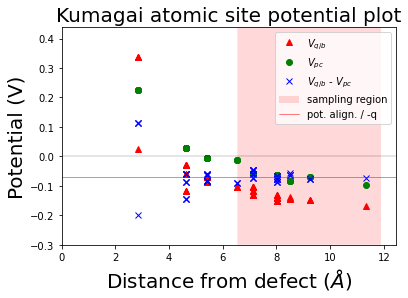

In [13]:
get_correction_kumagai(te_cd_1_ent, epsilon=dielectric, title="kmg")

## YTOS Fluorine Interstitial

In [14]:
ytos_dielectric = [[40.71948719643814, -9.282128210266565e-14, 1.26076160303219e-14], [-9.301652644020242e-14, 40.71948719776858, 4.149879443489052e-14], [5.311743673463141e-15, 2.041077680836527e-14, 25.237620491130023]]

In [13]:
for i in os.listdir("../examples"):
    if "YTOS" in i:
        defect_file_path = f"../examples/{i}/Int_F_-1/"
        defect_charge = -1
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(
            path_to_defect=defect_file_path,
            path_to_bulk=f"../examples/{i}/Bulk/",
            dielectric=ytos_dielectric,
            defect_charge=defect_charge,
        )
        sdp.kumagai_loader()
        int_f_minus1_ent = sdp.defect_entry


Final Kumagai correction is 0.016 eV


0.0155169495708003

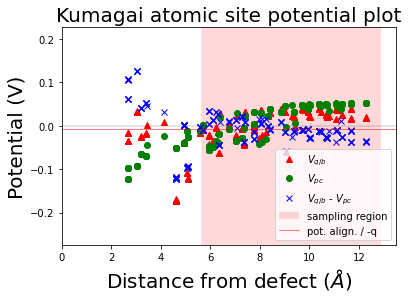

In [15]:
get_correction_kumagai(int_f_minus1_ent, epsilon=ytos_dielectric, title="kmg")

In [16]:
int_f_minus1_ent.site

PeriodicSite: F (11.2707, 11.2707, 11.0697) [1.0000, 1.0000, 0.4847]

In [17]:
int_f_minus1_ent.defect.site

PeriodicSite: F (11.2707, 11.2707, 11.0697) [1.0000, 1.0000, 0.4847]

In [18]:
int_f_minus1_ent.parameters["defect_frac_sc_coords"]

array([1.00000002, 1.00000003, 0.48467803])

In [19]:
int_f_minus1_ent.parameters["initial_defect_structure"]

Structure Summary
Lattice
    abc : 11.270724 11.270724 22.839319
 angles : 90.0 90.0 90.0
 volume : 2901.2608661201107
      A : 11.270724 0.0 0.0
      B : 0.0 11.270724 0.0
      C : 0.0 0.0 22.839319
    pbc : True True True
PeriodicSite: Y (1.8785, 1.8785, 3.7940) [0.1667, 0.1667, 0.1661]
PeriodicSite: Y (1.8785, 5.6354, 3.7940) [0.1667, 0.5000, 0.1661]
PeriodicSite: Y (1.8785, 9.3923, 3.7940) [0.1667, 0.8333, 0.1661]
PeriodicSite: Y (5.6354, 1.8785, 3.7940) [0.5000, 0.1667, 0.1661]
PeriodicSite: Y (5.6354, 5.6354, 3.7940) [0.5000, 0.5000, 0.1661]
PeriodicSite: Y (5.6354, 9.3923, 3.7940) [0.5000, 0.8333, 0.1661]
PeriodicSite: Y (9.3923, 1.8785, 3.7940) [0.8333, 0.1667, 0.1661]
PeriodicSite: Y (9.3923, 5.6354, 3.7940) [0.8333, 0.5000, 0.1661]
PeriodicSite: Y (9.3923, 9.3923, 3.7940) [0.8333, 0.8333, 0.1661]
PeriodicSite: Y (0.0000, 11.2707, 7.6257) [0.0000, 1.0000, 0.3339]
PeriodicSite: Y (0.0000, 3.7569, 7.6257) [0.0000, 0.3333, 0.3339]
PeriodicSite: Y (0.0000, 7.5138, 7.6257) [0.

In [20]:
int_f_minus1_ent.parameters["unrelaxed_defect_structure"]

Structure Summary
Lattice
    abc : 11.270724 11.270724 22.839319
 angles : 90.0 90.0 90.0
 volume : 2901.2608661201107
      A : 11.270724 0.0 0.0
      B : 0.0 11.270724 0.0
      C : 0.0 0.0 22.839319
    pbc : True True True
PeriodicSite: Y (1.8785, 1.8785, 3.7940) [0.1667, 0.1667, 0.1661]
PeriodicSite: Y (1.8785, 5.6354, 3.7940) [0.1667, 0.5000, 0.1661]
PeriodicSite: Y (1.8785, 9.3923, 3.7940) [0.1667, 0.8333, 0.1661]
PeriodicSite: Y (5.6354, 1.8785, 3.7940) [0.5000, 0.1667, 0.1661]
PeriodicSite: Y (5.6354, 5.6354, 3.7940) [0.5000, 0.5000, 0.1661]
PeriodicSite: Y (5.6354, 9.3923, 3.7940) [0.5000, 0.8333, 0.1661]
PeriodicSite: Y (9.3923, 1.8785, 3.7940) [0.8333, 0.1667, 0.1661]
PeriodicSite: Y (9.3923, 5.6354, 3.7940) [0.8333, 0.5000, 0.1661]
PeriodicSite: Y (9.3923, 9.3923, 3.7940) [0.8333, 0.8333, 0.1661]
PeriodicSite: Y (0.0000, 11.2707, 7.6257) [0.0000, 1.0000, 0.3339]
PeriodicSite: Y (0.0000, 3.7569, 7.6257) [0.0000, 0.3333, 0.3339]
PeriodicSite: Y (0.0000, 7.5138, 7.6257) [0.

## YTOS Extrinsic Fluorine Substitution

In [33]:
for i in os.listdir("../examples"):
    if "YTOS" in i:
        defect_file_path = f"../examples/{i}/F_O_1/"
        defect_charge = +1
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(
            path_to_defect=defect_file_path,
            path_to_bulk=f"../examples/{i}/Bulk/",
            dielectric=ytos_dielectric,
            defect_charge=defect_charge,
        )
        sdp.kumagai_loader()
        F_O_1_ent = sdp.defect_entry

In [38]:
F_O_1_ent.energy

-0.08523418000004312


Final Kumagai correction is 0.082 eV


0.08214054536906357

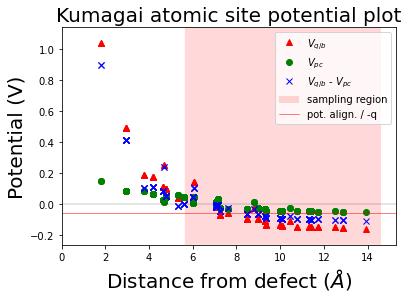

In [28]:
get_correction_kumagai(F_O_1_ent, epsilon=ytos_dielectric, title="kmg")

In [31]:
for i in os.listdir("../examples"):
    if "YTOS" in i:
        defect_file_path = f"../examples/{i}/F_O_1/"
        defect_charge = +1
        # parse with no transformation.json:
        sdp = parse_calculations.SingleDefectParser.from_paths(
            path_to_defect=defect_file_path,
            path_to_bulk=f"../examples/{i}/Bulk/",
            dielectric=ytos_dielectric,
            defect_charge=defect_charge,
        )
        sdp.freysoldt_loader()
        F_O_1_ent = sdp.defect_entry

Final Freysoldt correction is 0.116 eV


0.11602321245859282

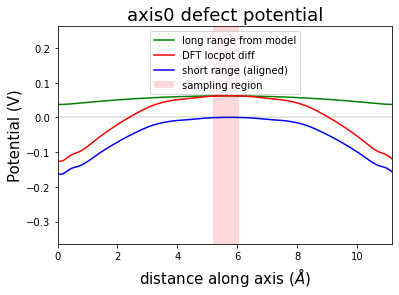

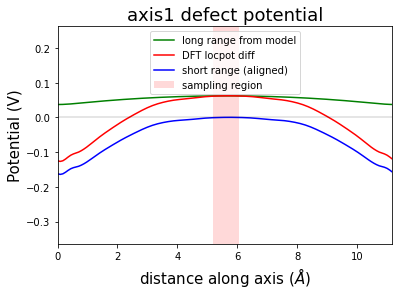

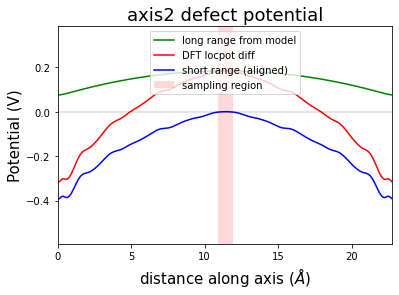

In [32]:
get_correction_freysoldt(F_O_1_ent, epsilon=ytos_dielectric, plot=True)